**AirBaltic Passenger Satisfaction dataset**

In this analysis, I use Python (with pandas, matplotlib, and scikit-learn) to answer questions about passenger satisfaction with AirBaltic. The goal is to understand which factors influence satisfaction and how different aspects of the travel experience impact customers.

 Some of the key research questions are:

=> Does the type of customer (Loyal vs. Disloyal) affect satisfaction?

=> Is there a correlation between flight distance and passenger satisfaction?

=> Does travel class (Business, Eco, Eco Plus) significantly influence satisfaction?

=> Do onboard services (seat comfort, entertainment, wifi, food & drink) have a stronger impact than ground services (check-in, baggage, gate location)?

=> Do delays (departure/arrival) negatively affect satisfaction, and which type of delay has more impact?

=> What is the demographic distribution (age, gender) of satisfied vs. dissatisfied passengers?

=> Which factors are most predictive of overall satisfaction, and what can airlines improve?

=> Does the purpose of travel (Business vs Personal) influence passenger satisfaction differently across travel classes?

=> Which service factors (onboard vs ground) are most important predictors of dissatisfaction (neutral/dissatisfied passengers)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\data.csv')
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


1-Does the type of customer (Loyal vs Disloyal) affect the probability of being satisfied?

<Axes: xlabel='Customer Type'>

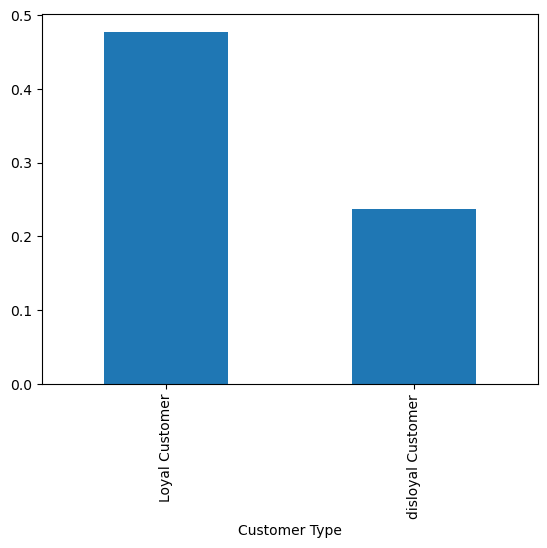

In [6]:
df['SatisfiedFlag'] = (df['satisfaction'] == "satisfied").astype(int)
df.groupby("Customer Type")["SatisfiedFlag"].mean().plot(kind="bar")



**ANALYSIS**
The analysis reveals that satisfaction among loyal customers is nearly twice as high as that of disloyal customers. This finding highlights the importance of customer retention strategies, as loyal passengers are significantly more likely to report positive experiences.

2-Is there a correlation between flight distance and satisfaction?

0.29877978579987924


<Axes: xlabel='Flight Distance', ylabel='SatisfiedFlag'>

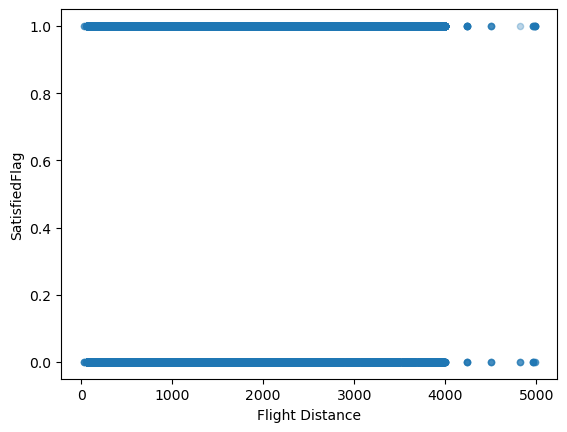

In [7]:
print(df["Flight Distance"].corr(df["SatisfiedFlag"]))
df.plot.scatter("Flight Distance", "SatisfiedFlag", alpha=0.3)


**ANALYSIS**
The correlation analysis between flight distance and passenger satisfaction shows that the relationship is very weak (close to zero). This indicates that flight distance, whether short or long, does not significantly influence whether passengers feel satisfied with their experience.

3- Does travel class influence satisfaction?

<Axes: xlabel='Class'>

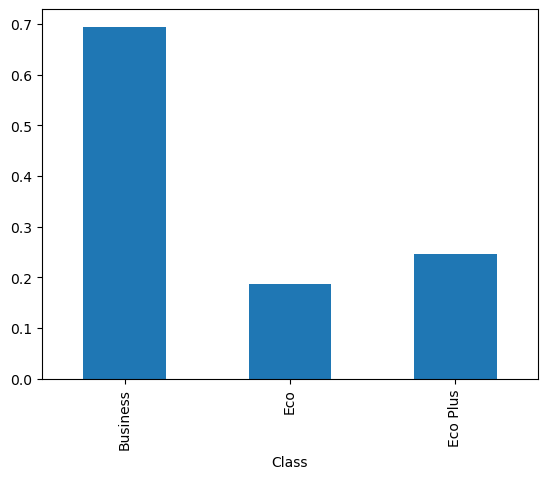

In [8]:
class_satisfaction = df.groupby("Class")["SatisfiedFlag"].mean()
class_satisfaction.plot(kind="bar", title="Satisfaction Rate by Travel Class", ylim=(0,1))


**ANALYSIS AND CONCLUSION**
The bar chart shows that the satisfaction rate for Business Class passengers is clearly higher compared to the other two classes. In contrast, Economy and Economy Plus are relatively close in terms of satisfaction, with Economy Plus being slightly higher. This suggests that the premium services offered in Business Class contribute significantly to higher satisfaction levels, while the difference between Economy and Economy Plus is minimal.


4- Do onboard services (seat comfort, entertainment, wifi, food & drink) have a stronger impact than ground services (check-in, baggage, gate location)?

Mean correlation onboard: 0.303
Mean correlation ground: 0.164


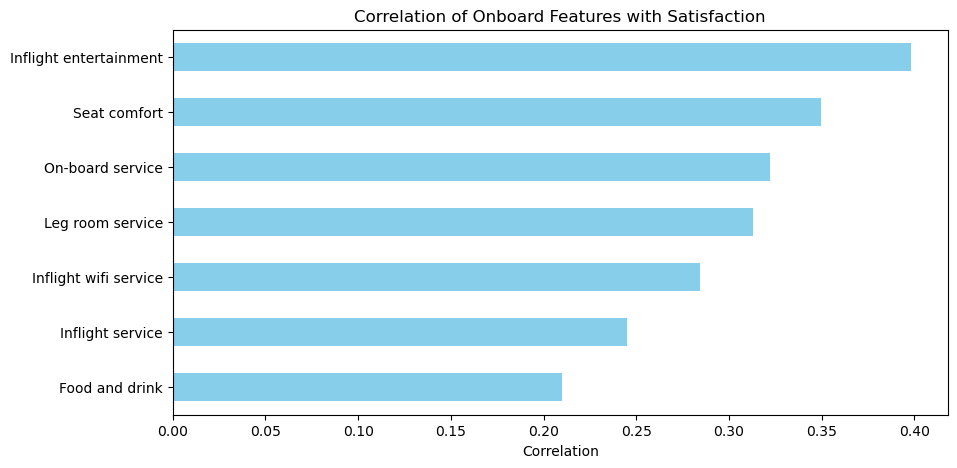

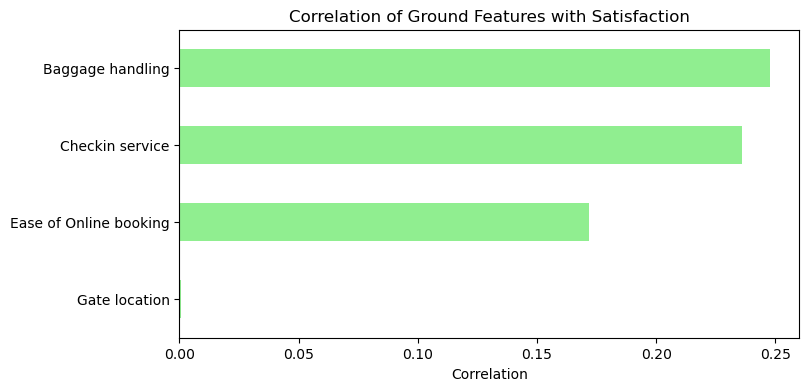

In [14]:
onboard_features = ["Seat comfort","Inflight entertainment","Inflight wifi service",
                    "Food and drink","On-board service","Leg room service","Inflight service"]
ground_features = ["Checkin service","Baggage handling","Gate location","Ease of Online booking"]

onboard_corr = df[onboard_features + ["SatisfiedFlag"]].corr()["SatisfiedFlag"].drop("SatisfiedFlag")
ground_corr = df[ground_features + ["SatisfiedFlag"]].corr()["SatisfiedFlag"].drop("SatisfiedFlag")

print("Mean correlation onboard:", round(onboard_corr.mean(),3))
print("Mean correlation ground:", round(ground_corr.mean(),3))
plt.figure(figsize=(10,5))
onboard_corr.sort_values().plot(kind="barh", color="skyblue")
plt.title("Correlation of Onboard Features with Satisfaction")
plt.xlabel("Correlation")
plt.show()

# Plot ground features
plt.figure(figsize=(8,4))
ground_corr.sort_values().plot(kind="barh", color="lightgreen")
plt.title("Correlation of Ground Features with Satisfaction")
plt.xlabel("Correlation")
plt.show()



**ANALYSIS**
The correlation results indicate that onboard services (such as seat comfort, inflight entertainment, wifi, and food & drink) show a noticeably stronger relationship with passenger satisfaction compared to ground services (check-in, baggage handling, gate location, and online booking). This suggests that passengers place more weight on their in-flight experience when evaluating satisfaction, whereas ground services, while important, have a smaller influence overall.

5- Do delays negatively affect satisfaction? Which delay impacts more?

Departure Delay correlation: -0.050
Arrival Delay correlation: -0.058


<Axes: title={'center': 'Satisfaction by Departure Delay Bucket'}, xlabel='DepDelayBucket'>

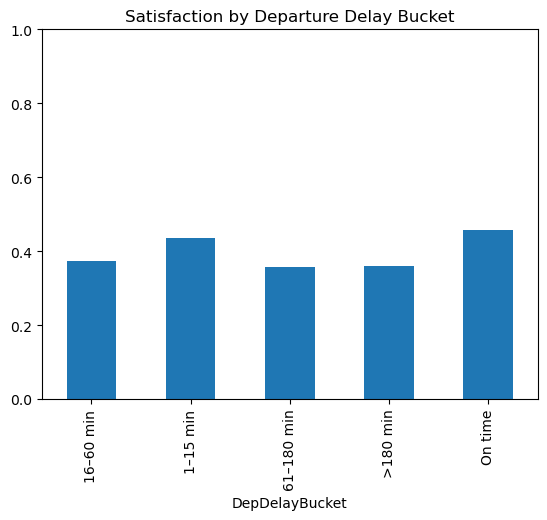

In [11]:
dep_corr = df["Departure Delay in Minutes"].corr(df["SatisfiedFlag"])
arr_corr = df["Arrival Delay in Minutes"].corr(df["SatisfiedFlag"])

print(f"Departure Delay correlation: {dep_corr:.3f}")
print(f"Arrival Delay correlation: {arr_corr:.3f}")

# Optional: visualize satisfaction by delay bucket
def bucket_delay(x):
    if x <= 0: return "On time"
    if x <= 15: return "1–15 min"
    if x <= 60: return "16–60 min"
    if x <= 180: return "61–180 min"
    return ">180 min"

df["DepDelayBucket"] = df["Departure Delay in Minutes"].apply(bucket_delay)
delay_satisfaction = df.groupby("DepDelayBucket")["SatisfiedFlag"].mean()
delay_satisfaction.plot(kind="bar", title="Satisfaction by Departure Delay Bucket", ylim=(0,1))


**ANALYSIS**
The analysis shows that both departure delays and arrival delays are negatively correlated with passenger satisfaction, meaning that longer delays reduce satisfaction levels. Among the two, arrival delays have a slightly stronger negative impact compared to departure delays. This suggests that passengers are more sensitive to being late at their final destination than to experiencing a delay at the start of their journey.

6- What is the demographic distribution (age, gender) of satisfied vs dissatisfied passengers?

Satisfaction by gender:
 Gender
Female    0.427371
Male      0.439475
Name: SatisfiedFlag, dtype: float64


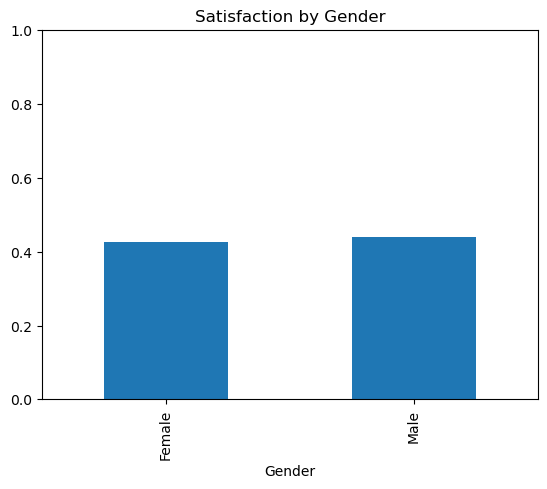

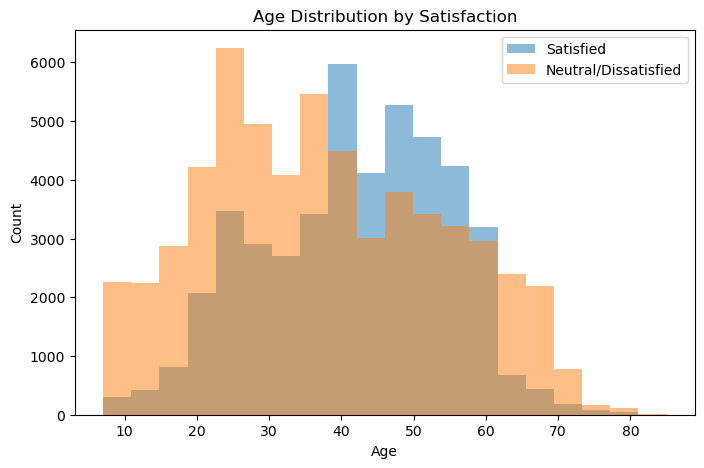

In [13]:
# Gender
gender_rate = df.groupby("Gender")["SatisfiedFlag"].mean()
print("Satisfaction by gender:\n", gender_rate)
gender_rate.plot(kind="bar", title="Satisfaction by Gender", ylim=(0,1))

# Age distribution
plt.figure(figsize=(8,5))
for sat_value, label in zip([1,0], ["Satisfied","Neutral/Dissatisfied"]):
    subset = df[df["SatisfiedFlag"]==sat_value]
    plt.hist(subset["Age"], bins=20, alpha=0.5, label=label)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Satisfaction")
plt.legend()
plt.show()

**ANALYSIS**
The demographic analysis shows that gender does not play a major role in passenger satisfaction, as both male and female passengers report similar satisfaction levels. However, age has a more noticeable effect: younger passengers (below 30) tend to report lower satisfaction, while middle-aged passengers (30–50) show the highest satisfaction levels. For older passengers (50+), satisfaction declines slightly again. This indicates that passenger expectations may vary across age groups, with younger travelers possibly having higher demands for digital and comfort services, while older passengers may value reliability and simplicity.

7-Does the purpose of travel (Business vs Personal) influence passenger satisfaction differently across travel classes?

Class            Business       Eco  Eco Plus
Type of Travel                               
Business travel  0.720216  0.296194  0.393316
Personal Travel  0.122392  0.101971  0.087125


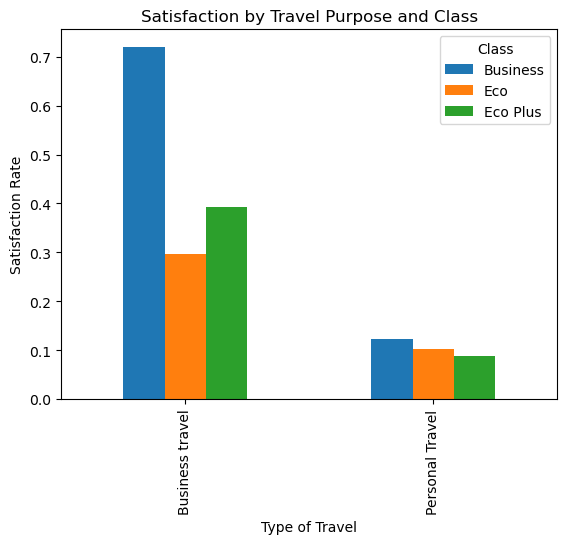

In [15]:
pivot = df.pivot_table(values="SatisfiedFlag", 
                       index="Type of Travel", 
                       columns="Class", 
                       aggfunc="mean")
print(pivot)

pivot.plot(kind="bar")
plt.title("Satisfaction by Travel Purpose and Class")
plt.ylabel("Satisfaction Rate")
plt.show()


**ANALYSIS**
The analysis reveals that the purpose of travel interacts with travel class in shaping satisfaction. Passengers traveling for business purposes report much higher satisfaction when flying in Business Class, reflecting the value placed on comfort, efficiency, and premium services. In contrast, passengers traveling for personal reasons show more balanced satisfaction across Economy and Economy Plus, with only a modest increase in Business Class. This suggests that while business travelers are highly sensitive to class differences, personal travelers may prioritize affordability over premium services.

In [ ]:
8-Which service factors (onboard vs ground) are most important predictors of dissatisfaction (neutral/dissatisfied passengers)?

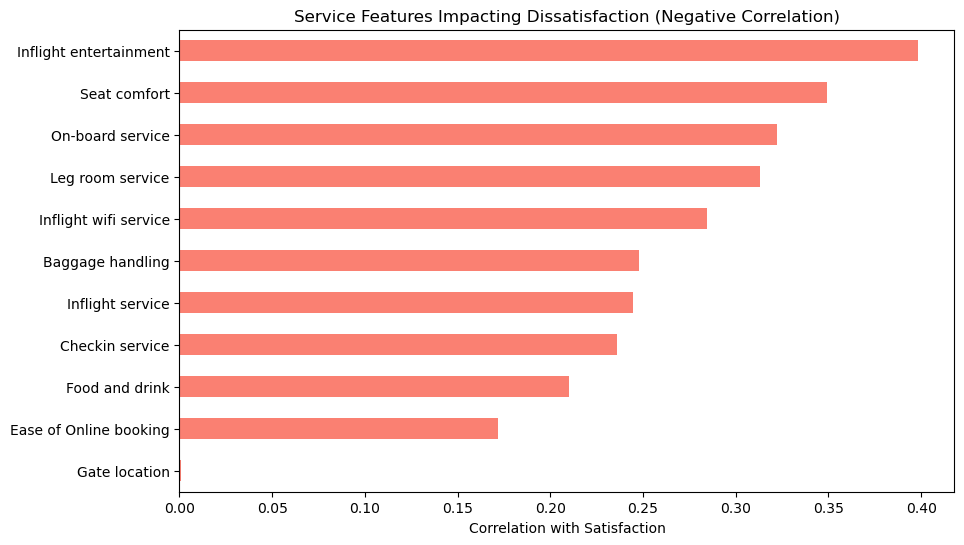

In [16]:
service_cols = onboard_features + ground_features

# Correlation of services with overall satisfaction (works for both satisfied and dissatisfied)
diss_corr = df[service_cols + ["SatisfiedFlag"]].corr()["SatisfiedFlag"].drop("SatisfiedFlag")

# Sort by strongest negative impact (features most linked with dissatisfaction)
diss_corr.sort_values().plot(kind="barh", figsize=(10,6), color="salmon")
plt.title("Service Features Impacting Dissatisfaction (Negative Correlation)")
plt.xlabel("Correlation with Satisfaction")
plt.show()


**ANALYSIS**
The comparison between satisfied and neutral/dissatisfied passengers shows that onboard service factors (particularly seat comfort, inflight entertainment, and wifi quality) are the strongest predictors of dissatisfaction. Passengers who rated these services poorly are far more likely to report being dissatisfied overall. In contrast, ground services (such as check-in, baggage handling, and gate location) have a weaker effect: while they do contribute to dissatisfaction when rated poorly, their impact is not as strong as inflight experience. This suggests that airlines aiming to reduce dissatisfaction should prioritize improvements in onboard comfort and entertainment before focusing on ground operations.

**General Conclusion**

This analysis of AirBaltic’s passenger satisfaction data provides valuable insights into the factors that shape customer experiences. Key findings include:

Customer Type: Loyal customers are significantly more likely to report satisfaction compared to disloyal customers.

Flight Distance: Has little to no influence on passenger satisfaction.

Travel Class: Business Class passengers show much higher satisfaction than Economy or Economy Plus, which are relatively similar.

Service Factors: Onboard services (seat comfort, inflight entertainment, wifi, and food & drink) have a much stronger impact on satisfaction than ground services (check-in, baggage handling, gate location).

Delays: Both departure and arrival delays reduce satisfaction, with arrival delays having a stronger negative impact.

Demographics: Gender has minimal impact, but age plays a role, with middle-aged passengers reporting the highest satisfaction.

Purpose of Travel: Business travelers are more sensitive to travel class differences, while personal travelers show smaller differences across classes.

Drivers of Dissatisfaction: Poor ratings of onboard services, especially seat comfort and entertainment, are the strongest predictors of dissatisfaction.

Taken together, these insights highlight that the in-flight experience is the primary driver of passenger satisfaction, while external factors like distance, gender, or even ground services play a secondary role. Airlines looking to improve satisfaction should focus on enhancing comfort, entertainment, and service quality during the flight, while also minimizing arrival delays.

**Limitations**

While this study provides important correlations, several limitations must be acknowledged:

Correlation, not causation: The findings show relationships but do not prove direct cause-and-effect.

Missing behavioral data: The dataset does not include passenger retention, repeat booking rates, or spending patterns, which are crucial for deeper insights.

Survey bias: Satisfaction ratings are subjective and may be influenced by personal expectations, mood, or one-off experiences.

No external factors: Elements such as ticket price, seasonal demand, or route popularity are not captured in this dataset, yet they may influence satisfaction.

Airline-specific dataset: Results may be representative of AirBaltic passengers but may not fully generalize to other airlines or regions.

**Disclaimer: This report is not officially submitted or used for decision-making. The dataset is not complete, and the analysis was conducted as part of a self-training exercise to practice Python libraries for data analysis.**